# Multiple Time Frame Moving Averages Example

### Overview

This project is one of the many learning materials published by Thomson Reuters to help developers learning Thomson Reuters APIs. 

This specific project source code is part of the [Mulitple Time Frame Moving Averages Example](https://developers.thomsonreuters.com/eikon-apis/eikon-web-and-scripting-apis-limited-access/learning?content=15416&type=learning_material_item) tutorial published on the [Thomson Reuters Developer Community portal](https://developers.thomsonreuters.com) for the [Eikon Web and Scripting](https://developers.thomsonreuters.com/eikon-apis/eikon-web-and-scripting-apis-limited-access) APIs. Please consult this page for more learning materials and documentation about this API.

For any question related to this tutorial please use the Developer Community [Q&A Forum](https://community.developers.thomsonreuters.com).

***Note:** To be able to ask questions and to benefit from the full content available on the [Thomson Reuters Developer Community portal](https://developers.thomsonreuters.com) we recommend you to register [here]( https://developers.thomsonreuters.com/iam/register) and [login]( https://developers.thomsonreuters.com/iam/login?destination_path=Lw%3D%3D).*


In this tutorial we will be downloading a timeseries of VOD.L (Vodafone) stockprice closes, for Hourly, Daily, Weekly and Monthly frequencies. We will then be creating a series of Simple Moving Averages (20, 50 & 100 period). I will also demonstrate how to resample the hourly timeseries to 4 Hour timeseries - using built-in functions of Pandas (this of course can be applied to other frequencies such as Minute - to generate 10 minute or 30 minute frequencies). Finally - I will plot these on a chart. 

Before we start, let's make sure that:

* Thomson Reuters Eikon Scripting Proxy is up and running;

* Thomson Reuters Eikon API library is installed;

* You have created an application ID for this script.

If you have not yet done this, have a look at the quick start section for this API.

First off, lets load the libraries we will be using, eikon (for data retrieval), pandas (for dataframes) and matplotlib (for charting) - and we need to generate an App_ID from the Eikon Scripting Proxy and pass this to the App to allow download of data.

In [1]:
import eikon as ek #v0.14
import pandas as pd #v19
import matplotlib as plt
ek.set_app_id('Your App_ID Here')

Next lets download some data and store the result in a few pandas dataframes - please note the use of the normalize=True parameter which you should use so that the dataframe is formatted correctly - this is important for both charting and calculation. We can also check we have downloaded data by looking at the tail (or head) of a dataframe.

In [2]:
Hourly = ek.get_timeseries(["VOD.L"], fields=["Close"], start_date = "2016-03-01", end_date = "2017-03-27", 
                            interval="hour")
Daily = ek.get_timeseries(["VOD.L"], fields=["Close"], start_date = "2016-03-01", end_date = "2017-03-27", 
                            interval="daily")
Weekly = ek.get_timeseries(["VOD.L"], fields=["Close"], start_date = "2016-03-01", end_date = "2017-03-27", 
                            interval="weekly")
Monthly = ek.get_timeseries(["VOD.L"], fields=["Close"], start_date = "2016-03-01", end_date = "2017-03-27", 
                            interval="monthly")
Hourly.tail()

VOD.L,CLOSE
Date,
2017-03-24 13:00:00,211.5500
2017-03-24 14:00:00,211.2245
2017-03-24 15:00:00,211.6000
2017-03-24 16:00:00,211.6500
2017-03-24 17:00:00,211.8000


Great! We now have data flowing into a dataframe which is automatically indexed with the date field (a datetiem object). Now I also want a 4 hour frequency frame, but I only have an hourly frequency - what to do? Thankfully pandas has some built-in functionality which allows us to resample the hourly data into (dis)aggregates thereof (known as downsampling) - in our case 4 hourly.

In [3]:
FourHour = Hourly.resample('4H').last().dropna()
FourHour.head()

VOD.L,CLOSE
Date,
2016-04-19 08:00:00,233.3160
2016-04-19 12:00:00,230.9000
2016-04-20 12:00:00,232.1500
2016-04-20 16:00:00,231.5856
2016-04-21 08:00:00,232.4500


Now that we have our resampled frame, lets generate some moving averages as new columns in each of the dataframes

In [5]:
framelist =['Hourly','FourHour','Daily','Weekly','Monthly']

for frame in framelist:
    vars()[frame]['MAV20'] = vars()[frame]['CLOSE'].rolling(window=20).mean()
    vars()[frame]['MAV50'] = vars()[frame]['CLOSE'].rolling(window=50).mean()
    vars()[frame]['MAV100'] = vars()[frame]['CLOSE'].rolling(window=100).mean()
    
Hourly.tail()

VOD.L,CLOSE,MAV20,MAV50,MAV100
Date,,,,
2017-03-24 13:00:00,211.5500,209.283000,209.89438,207.322222
2017-03-24 14:00:00,211.2245,209.459225,209.93887,207.410967
2017-03-24 15:00:00,211.6000,209.636725,209.99087,207.503467
2017-03-24 16:00:00,211.6500,209.838225,210.02087,207.579967
2017-03-24 17:00:00,211.8000,210.060725,210.05287,207.664967


Voila! 3 shiny new moving averages in each frame. So, lets now plot these on a chart.

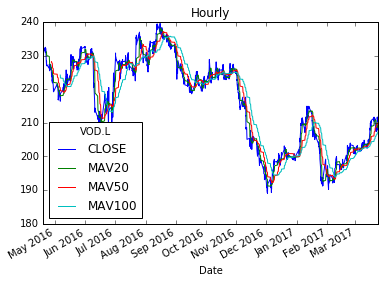

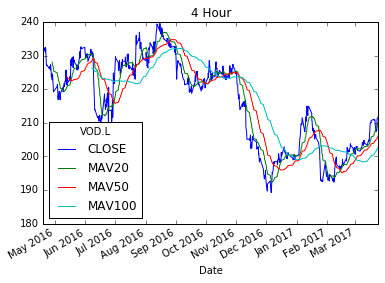

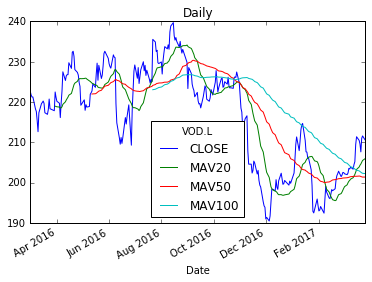

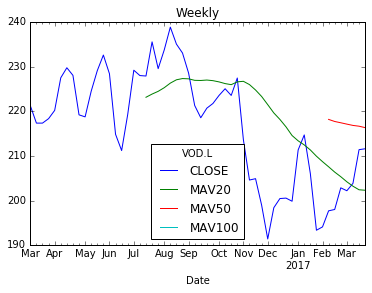

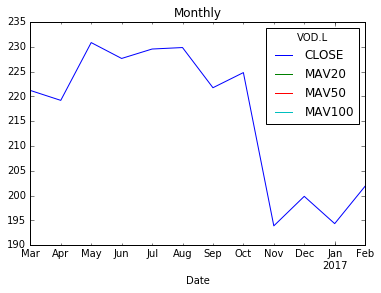

In [7]:
%matplotlib inline
Hourly.plot(title="Hourly")
FourHour.plot(title="4 Hour")
Daily.plot(title="Daily")
Weekly.plot(title="Weekly")
Monthly.plot(title="Monthly")

## Appendix: Timeseries Output Formats

We have tried to design default outputs for the main different forms of request to make it more intuitive for downstream processing. Here I will go through the main request forms:

### One Security, N Fields (one or more)

In [8]:
oneXN =ek.get_timeseries("VOD.L", fields='*', start_date = "2016-03-01", end_date = "2017-03-27", 
                            interval="hour")
oneXN.tail()

VOD.L,HIGH,LOW,OPEN,CLOSE,COUNT,VOLUME
Date,,,,,,
2017-03-24 13:00:00,211.85,210.941476,211.700,211.5500,694.0,2479065.0
2017-03-24 14:00:00,211.80,211.070000,211.600,211.2245,1695.0,4394694.0
2017-03-24 15:00:00,211.75,210.900000,211.231,211.6000,1161.0,2883549.0
2017-03-24 16:00:00,211.85,211.400000,211.600,211.6500,1001.0,2598388.0
2017-03-24 17:00:00,211.80,211.350000,211.650,211.8000,842.0,2910966.0


### N Securities, One Field

In [26]:
NXone = ek.get_timeseries(['BARC.L'], "Close", start_date = "2016-03-01", end_date = "2017-03-27", 
                            interval="daily")
NXone.tail()

BARC.L,CLOSE
Date,
2017-03-21,230.00
2017-03-22,224.55
2017-03-23,223.90
2017-03-24,226.95
2017-03-27,224.20


### N Securities, N Fields

In [24]:
NxN = ek.get_timeseries(['BARC.L','VOD.L'], fields=["Open","High","Low","Close"], start_date = "2016-03-01", end_date = "2017-03-27", 
                            interval="daily")
NxN.tail()

Security        BARC.L                         VOD.L              
Field            CLOSE   HIGH     LOW     OPEN CLOSE HIGH LOW OPEN
Date                                                              
2017-03-21  212.200000  212.0  209.60  209.100   NaN  NaN NaN  NaN
2017-03-22  210.212300  209.2  207.65  207.039   NaN  NaN NaN  NaN
2017-03-23  211.850000  209.1  211.00  206.850   NaN  NaN NaN  NaN
2017-03-24  211.850000  211.5  211.60  210.100   NaN  NaN NaN  NaN
2017-03-27  211.291136  210.8  210.60  208.650   NaN  NaN NaN  NaN

### Normalisation

We also provide a normalize=True/False parameter which allows you to override our default output shapes and gives you a normalized output shape which you can then process as you wish - with four columns Date, Field, Security, Value. 

In [35]:
norm = ek.get_timeseries(['BARC.L','VOD.L'], fields=["Open","High","Low","Close"], start_date = "2016-03-01", end_date = "2017-03-27", 
                            interval="daily", normalize=True)
#norm.head()
norm.tail()

,Date,Field,Security,Value
1083,2017-03-24,CLOSE,VOD.L,211.600000
1084,2017-03-27,OPEN,VOD.L,210.800000
1085,2017-03-27,HIGH,VOD.L,211.291136
1086,2017-03-27,LOW,VOD.L,208.650000
1087,2017-03-27,CLOSE,VOD.L,210.600000


Author: jason.ramchandani@tr.com